# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [19]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities = cities[:600]
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [39]:

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Create the Empty lists to the store the values & append
#set_count = np.arange(600)

city_name = []
cloudiness = []
country = []
date = []
Humidity = []
Lat = []
Lng = []
Max_temp = []
wind_speed = []

# Start the call counter
record = 1
#count_set = 1

# Print the following lines
print("Begining the data Retrieval")
print("---------------------------")
for city in cities:
    #for _set in set_count:
# Use Try statement to append calls where value is found 
# Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try:
        response = requests.get(f"{url}&q={city}").json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        Humidity.append(response["main"]["humidity"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        print(f"Processing Record {record} of set | {response['name']}.")
        
        # Increase the counter by one
        record = record + 1
        #if record >= 51:
#               count_set += 1
#               record = 0
        
        # put a rate limit not to exceed the rate limit of API
        time.sleep(1.0)
        
    # If no record found the skip to the next record
    except(KeyError, IndexError):
        print("City not found. Skipping....")

    continue 


Begining the data Retrieval
---------------------------
Processing Record 1 of set | Hamilton.
Processing Record 2 of set | Van.
Processing Record 3 of set | Geraldton.
Processing Record 4 of set | Cape Town.
Processing Record 5 of set | Mataura.
Processing Record 6 of set | Tarko-Sale.
Processing Record 7 of set | Katsuura.
Processing Record 8 of set | Tilichiki.
Processing Record 9 of set | Albany.
Processing Record 10 of set | Jaypur.
Processing Record 11 of set | Kapaa.
Processing Record 12 of set | Busselton.
Processing Record 13 of set | Chokurdakh.
Processing Record 14 of set | Lyuban.
Processing Record 15 of set | Umm Kaddadah.
Processing Record 16 of set | Petropavlovsk-Kamchatskiy.
Processing Record 17 of set | Omboue.
Processing Record 18 of set | Ponta do Sol.
Processing Record 19 of set | Hermanus.
Processing Record 20 of set | Marsh Harbour.
Processing Record 21 of set | Bambous Virieux.
Processing Record 22 of set | Kodiak.
Processing Record 23 of set | Thornaby.
Process

City not found. Skipping....
Processing Record 185 of set | Palu.
Processing Record 186 of set | Port Lincoln.
Processing Record 187 of set | Victor Harbor.
Processing Record 188 of set | Baherden.
City not found. Skipping....
Processing Record 189 of set | Yamada.
Processing Record 190 of set | Sayat.
Processing Record 191 of set | Dukat.
Processing Record 192 of set | Rockport.
Processing Record 193 of set | Koslan.
Processing Record 194 of set | Carnot.
Processing Record 195 of set | Luderitz.
Processing Record 196 of set | Springdale.
Processing Record 197 of set | Subiaco.
Processing Record 198 of set | Pevek.
City not found. Skipping....
Processing Record 199 of set | Zaozhuang.
Processing Record 200 of set | Nanzhou.
Processing Record 201 of set | Eyl.
Processing Record 202 of set | Rio Grande.
Processing Record 203 of set | Dikson.
Processing Record 204 of set | Yar-Sale.
Processing Record 205 of set | San Cristobal.
Processing Record 206 of set | Maragogi.
Processing Record 20

Processing Record 371 of set | Pingxiang.
Processing Record 372 of set | Zwedru.
Processing Record 373 of set | Vigo.
City not found. Skipping....
Processing Record 374 of set | Plover.
Processing Record 375 of set | Pathein.
Processing Record 376 of set | Kaili.
Processing Record 377 of set | Coruripe.
Processing Record 378 of set | Dingle.
Processing Record 379 of set | Puerto Leguizamo.
Processing Record 380 of set | Urucara.
Processing Record 381 of set | Gold Coast.
Processing Record 382 of set | Puerto Madero.
Processing Record 383 of set | Antsohihy.
Processing Record 384 of set | Puerto del Rosario.
City not found. Skipping....
Processing Record 385 of set | Boa Vista.
Processing Record 386 of set | Trinidad.
Processing Record 387 of set | Ilulissat.
Processing Record 388 of set | Zhezkazgan.
Processing Record 389 of set | Gizo.
City not found. Skipping....
Processing Record 390 of set | Galesong.
Processing Record 391 of set | Sozimskiy.
Processing Record 392 of set | Tongren.

In [32]:
# keys() funtion is useful to know what items are in the list,and with that i had written the code above for appending
# into the empty list created.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
response = requests.get(f"{url}&q={city}").json()
response.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [20]:
response

{'coord': {'lon': -151.75, 'lat': -16.48},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 83.05,
  'pressure': 1014.23,
  'humidity': 78,
  'temp_min': 83.05,
  'temp_max': 83.05,
  'sea_level': 1014.23,
  'grnd_level': 1014.32},
 'wind': {'speed': 13.04, 'deg': 90.03},
 'clouds': {'all': 30},
 'dt': 1558302370,
 'sys': {'message': 0.0068,
  'country': 'PF',
  'sunrise': 1558283062,
  'sunset': 1558323771},
 'id': 4034551,
 'name': 'Faanui',
 'cod': 200}

In [8]:
response['main'].keys()

dict_keys(['temp', 'pressure', 'humidity', 'temp_min', 'temp_max', 'sea_level', 'grnd_level'])

In [15]:
response['clouds'].keys()

dict_keys(['all'])

In [17]:
response['sys'].keys()

dict_keys(['message', 'country', 'sunrise', 'sunset'])

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:
# Create a dictonary with the lists generated
weather_dict = {"City":city_name,
                "Cloudiness":cloudiness, 
                "Country":country,
                "Date":date, 
                "Humidity":Humidity,
                "Lat":Lat, 
                "Lng":Lng, 
                "Max Temp":Max_temp,
                "Wind Speed":wind_speed}


# Create a data frame from dictionary
weather_data = pd.DataFrame(weather_dict)

# Display count of weather data values 
weather_data.count()

City          536
Cloudiness    536
Country       536
Date          536
Humidity      536
Lat           536
Lng           536
Max Temp      536
Wind Speed    536
dtype: int64

In [41]:
# Save data frame to CSV
weather_data.to_csv('../output_csv/weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hamilton,90,CA,1558555746,47,43.26,-79.87,66.00,18.34
1,Van,75,TR,1558556228,82,38.51,43.37,55.40,5.82
2,Geraldton,90,CA,1558556230,93,49.72,-86.95,46.40,8.05
3,Cape Town,0,ZA,1558556100,93,-33.93,18.42,60.01,3.36
4,Mataura,8,NZ,1558556232,80,-46.19,168.86,53.01,1.99


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

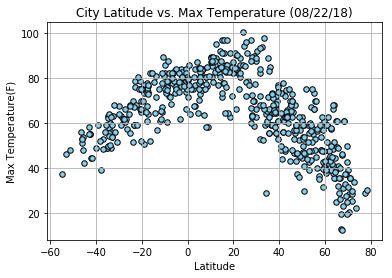

In [42]:
# scatter plot the dataset
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker = "o", s= 30, 
            edgecolors = 'black', facecolors = 'skyblue')

plt.title("City Latitude vs. Max Temperature (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid()

# Save the figure
plt.savefig("Latitude vs Max.Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

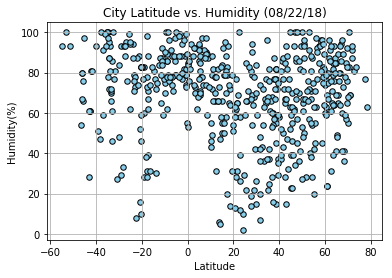

In [43]:
# scatter plot the dataset
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker = "o", s= 30, 
            edgecolors = 'black', facecolors = 'skyblue')

plt.title("City Latitude vs. Humidity (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()

# Save the figure
plt.savefig("Latitude_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

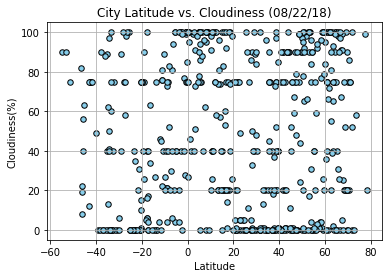

In [44]:
# scatter plot the dataset
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker = "o", s= 30, 
            edgecolors = 'black', facecolors = 'skyblue')

plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()

# Save the figure
plt.savefig("Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

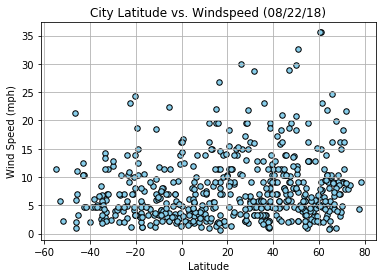

In [45]:
# scatter plot the dataset
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker = "o", s= 30, 
            edgecolors = 'black', facecolors = 'skyblue')

plt.title("City Latitude vs. Windspeed (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save the figure
plt.savefig("Latitude_vs_WindSpeed.png")

# Show plot
plt.show()